**Import Libraries:**

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


**Import File:**

In [222]:
data1 = pd.read_csv('/content/Walmart DataSet.csv')
data1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90000,0,42.31000,2.57200,211.09636,8.10600
1,1,12-02-2010,1641957.44000,1,38.51000,2.54800,211.24217,8.10600
2,1,19-02-2010,1611968.17000,0,39.93000,2.51400,211.28914,8.10600
3,1,26-02-2010,1409727.59000,0,46.63000,2.56100,211.31964,8.10600
4,1,05-03-2010,1554806.68000,0,46.50000,2.62500,211.35014,8.10600
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95000,0,64.88000,3.99700,192.01356,8.68400
6431,45,05-10-2012,733455.07000,0,64.89000,3.98500,192.17041,8.66700
6432,45,12-10-2012,734464.36000,0,54.47000,4.00000,192.32727,8.66700
6433,45,19-10-2012,718125.53000,0,56.47000,3.96900,192.33085,8.66700


In [223]:
data1.duplicated().sum()

0

In [224]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [225]:
data1.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [226]:
data1["Date"] = pd.to_datetime(data1["Date"], format='%d-%m-%Y') # convert to datetime
data1['week'] =data1['Date'].dt.isocalendar().week
data1['month'] =data1['Date'].dt.month
data1['year'] =data1['Date'].dt.year

In [227]:
data1.set_index('Date', inplace=True) #setting date as index

In [228]:
data1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
Date,,,,,,,,,,
2010-02-05,1,1643690.90000,0,42.31000,2.57200,211.09636,8.10600,5,2,2010
2010-02-12,1,1641957.44000,1,38.51000,2.54800,211.24217,8.10600,6,2,2010
2010-02-19,1,1611968.17000,0,39.93000,2.51400,211.28914,8.10600,7,2,2010
2010-02-26,1,1409727.59000,0,46.63000,2.56100,211.31964,8.10600,8,2,2010
2010-03-05,1,1554806.68000,0,46.50000,2.62500,211.35014,8.10600,9,3,2010


###**Outlier Analysis:**

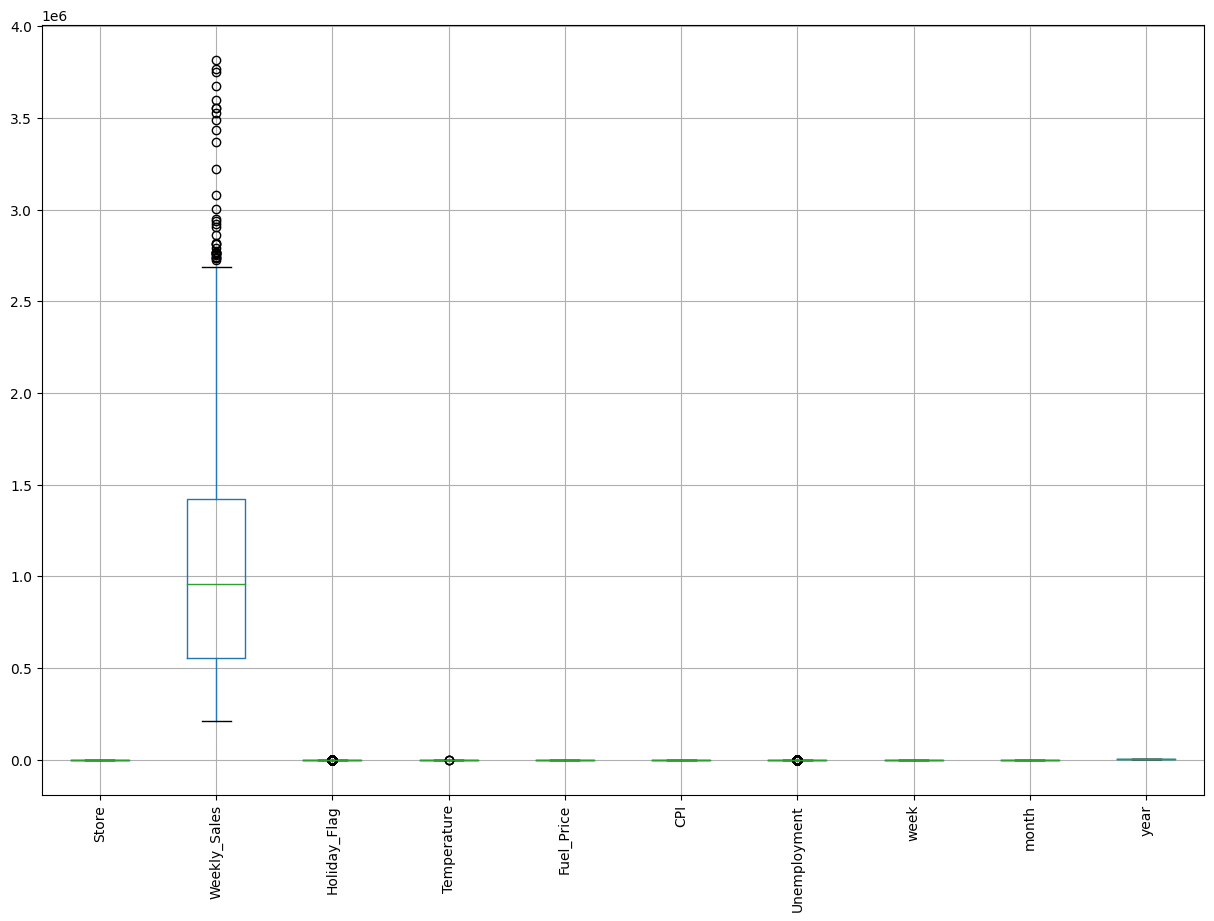

In [229]:
# now we will see if there are outliers in the data
fig, ax = plt.subplots(figsize=(15, 10))
# plotting the box plot for all columns
data1.boxplot(ax = ax)
plt.xticks(rotation = 90)
plt.show()

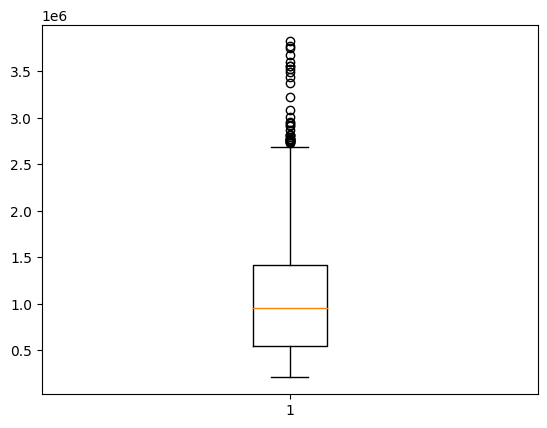

In [230]:
# plotting the distribution to visualize the outliers
plt.boxplot(data1['Weekly_Sales'])
plt.show()

In [231]:
# calculating the outliers for Income
Q1 = data1['Weekly_Sales'].quantile(0.25)
Q3 = data1['Weekly_Sales'].quantile(0.75)

IQR = Q3-Q1

# identifying the outliers
outliers = data1[(data1['Weekly_Sales']<(Q1 - 1.5*IQR)) | (data1['Weekly_Sales']>(Q3+1.5*IQR))]
print(f"Outliers: {len(outliers)}")

Outliers: 34


In [232]:
# removing the outliers
data1 = data1[~((data1['Weekly_Sales'] < (Q1 - 1.5 * IQR)) | (data1['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]
# ~ -> means not

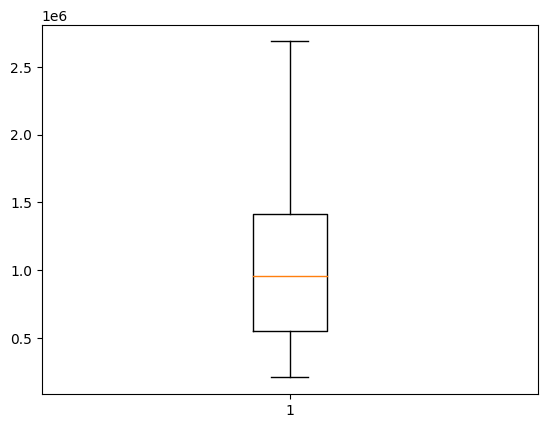

In [233]:
# plotting the distribution to visualize the outliers
plt.boxplot(data1['Weekly_Sales'])
plt.show()

## **Statistical Analysis:**

In [234]:
data1.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
count,6401.00000,6401.00000,6401.00000,6401.00000,6401.00000,6401.00000,6401.00000,6401.00000,6401.00000,6401.00000
mean,23.05421,1036130.35354,0.06890,60.77204,3.35963,171.64222,8.00230,25.69161,6.41947,2010.96797
std,12.99128,545196.05593,0.25330,18.41707,0.45970,39.35985,1.87871,14.05872,3.22366,0.79730
min,1.00000,209986.25000,0.00000,-2.06000,2.47200,126.06400,3.87900,1.00000,1.00000,2010.00000
25%,12.00000,551743.05000,0.00000,47.66000,2.93300,131.78400,6.89100,14.00000,4.00000,2010.00000
50%,23.00000,957298.26000,0.00000,62.86000,3.45200,182.65858,7.87400,26.00000,6.00000,2011.00000
75%,34.00000,1414564.53000,0.00000,75.00000,3.73700,212.83364,8.62200,37.00000,9.00000,2012.00000
max,45.00000,2685351.81000,1.00000,100.14000,4.46800,227.23281,14.31300,52.00000,12.00000,2012.00000


In [235]:
data1.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
Store,1.00000,-0.33288,0.00357,-0.02665,0.05786,-0.21248,0.22275,0.00710,0.00686,-0.00283
Weekly_Sales,-0.33288,1.00000,0.02536,-0.04434,0.01819,-0.06962,-0.10430,0.04354,0.04666,-0.00540
Holiday_Flag,0.00357,0.02536,1.00000,-0.15456,-0.07781,0.00012,0.01239,0.12404,0.11960,-0.05484
Temperature,-0.02665,-0.04434,-0.15456,1.00000,0.14308,0.17651,0.09927,0.24911,0.24839,0.06047
Fuel_Price,0.05786,0.01819,-0.07781,0.14308,1.00000,-0.17208,-0.03547,-0.02887,-0.03880,0.77944
CPI,-0.21248,-0.06962,0.00012,0.17651,-0.17208,1.00000,-0.30416,0.00881,0.00762,0.07408
Unemployment,0.22275,-0.10430,0.01239,0.09927,-0.03547,-0.30416,1.00000,-0.01318,-0.01009,-0.24296
week,0.00710,0.04354,0.12404,0.24911,-0.02887,0.00881,-0.01318,1.00000,0.99594,-0.17745
month,0.00686,0.04666,0.11960,0.24839,-0.03880,0.00762,-0.01009,0.99594,1.00000,-0.19022
year,-0.00283,-0.00540,-0.05484,0.06047,0.77944,0.07408,-0.24296,-0.17745,-0.19022,1.00000


<Axes: >

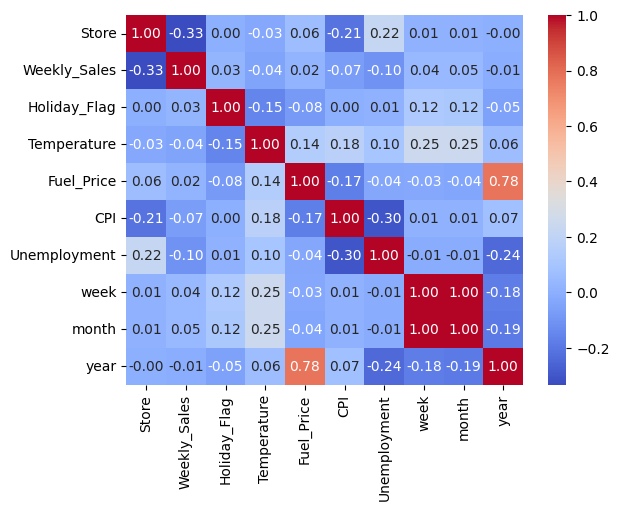

In [236]:
sns.heatmap(data1.corr(), cmap = 'coolwarm',annot = True, fmt='.2f')

## **Data Visualization:**

**Holiday Vs Non Holiday weekly sales:**

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

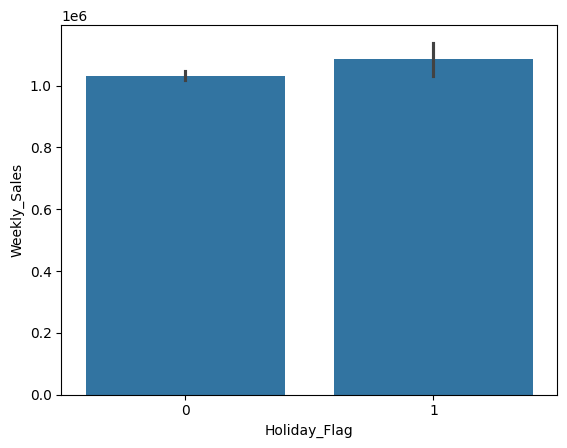

In [237]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=data1)

When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

## **e. Top performing stores according to the historical data.**

**Each store Weekly sales:**

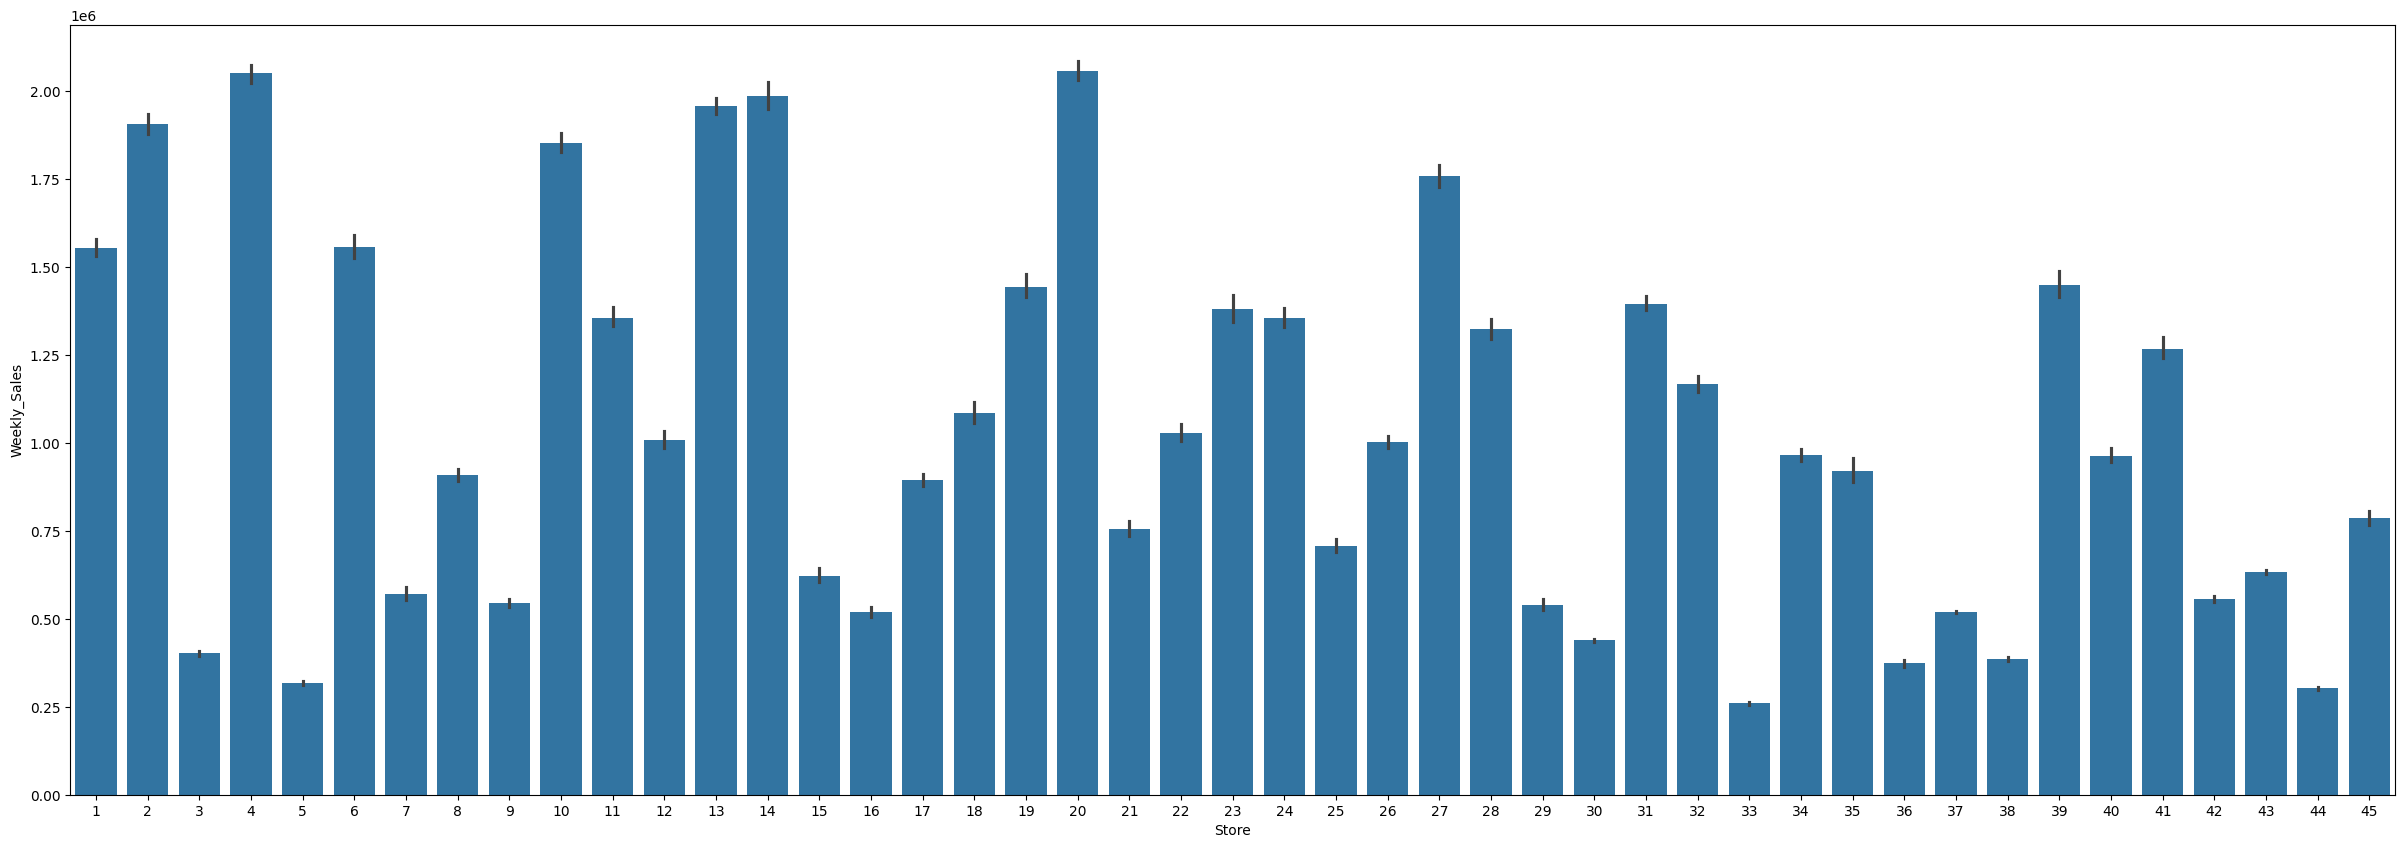

In [238]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=data1)

From the first graph, some stores has higher sales but on average store 20 is the best and 4 and 14 following it.

## **f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

In [239]:

total_sales = data1.groupby('Store')['Weekly_Sales'].sum()

worst_store = total_sales.idxmin()  # Store with the lowest total sales
best_store = total_sales.idxmax()   # Store with the highest total sales

difference = total_sales.max() - total_sales.min()  # Difference between highest and lowest total sales

print(f"Worst Performing Store: {worst_store}")
print(f"Best Performing Store: {best_store}")
print(f"Difference Between Highest and Lowest Performing Stores: {difference}")

Worst Performing Store: 33
Best Performing Store: 4
Difference Between Highest and Lowest Performing Stores: 243875002.96


### **DATE Vs WEEKLY SALES**

####Best month for Sales:

In [240]:
data1.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     923884.55136
2    1053199.79713
3    1013309.23296
4    1026761.56344
5    1031714.02213
6    1064324.59289
7    1031747.58294
8    1048017.45097
9     989335.34916
10    999632.11554
11   1102738.63405
12   1171398.83656
Name: Weekly_Sales, dtype: float64

####Best year for Sales:

In [241]:
data1.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010   1040918.86127
2011   1033779.52301
2012   1033660.39243
Name: Weekly_Sales, dtype: float64

**Yearly Weekly_sales with respect to month:**

<Axes: xlabel='month'>

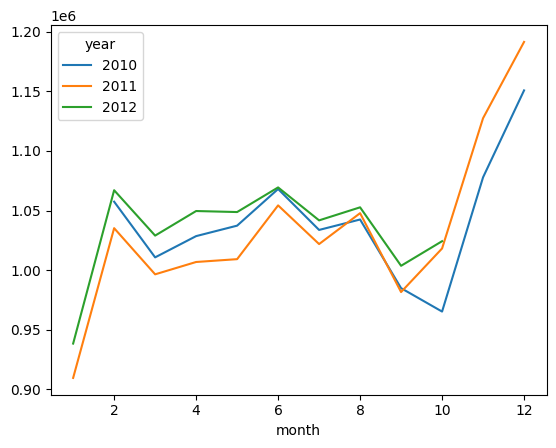

In [242]:
monthly_sales = pd.pivot_table(data1, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

In [243]:
monthly_sales

year,2010,2011,2012
month,,,
1,NaN,909466.48239,938302.62033
2,1057405.46133,1035174.04372,1067019.88633
3,1010665.56944,996424.71272,1028931.77996
4,1028499.41356,1006784.49320,1049560.58861
5,1037282.96856,1009156.43422,1048702.66361
6,1068034.29089,1054296.58439,1069379.24129
7,1033689.44880,1021828.43942,1041719.18000
8,1042445.06050,1047774.06806,1052670.06969
9,984821.64650,981545.50409,1003586.35817


**Month Vs Weekly_Sales:**

<Axes: xlabel='month', ylabel='Weekly_Sales'>

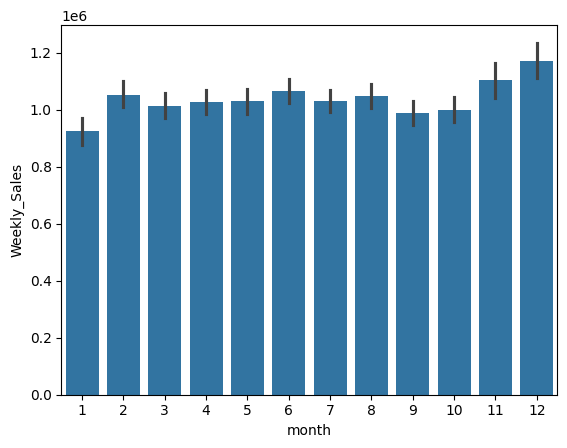

In [244]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=data1)
fig

Best sales are in December and November.

####Best week For Sales:

In [245]:
data1.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51   1403886.69243
47   1314322.76593
49   1218829.16865
50   1215933.29122
48   1103328.71522
Name: Weekly_Sales, dtype: float64

**Yearly Weekly_Sales with respect to Week:**

<Axes: xlabel='week'>

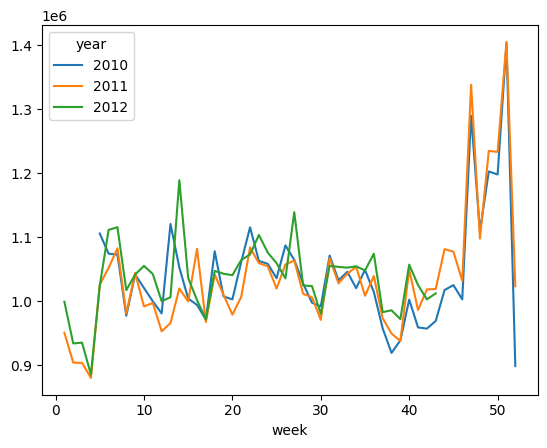

In [246]:
weekly_sales = pd.pivot_table(data1, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

**Week Vs Weekly_Sales:**

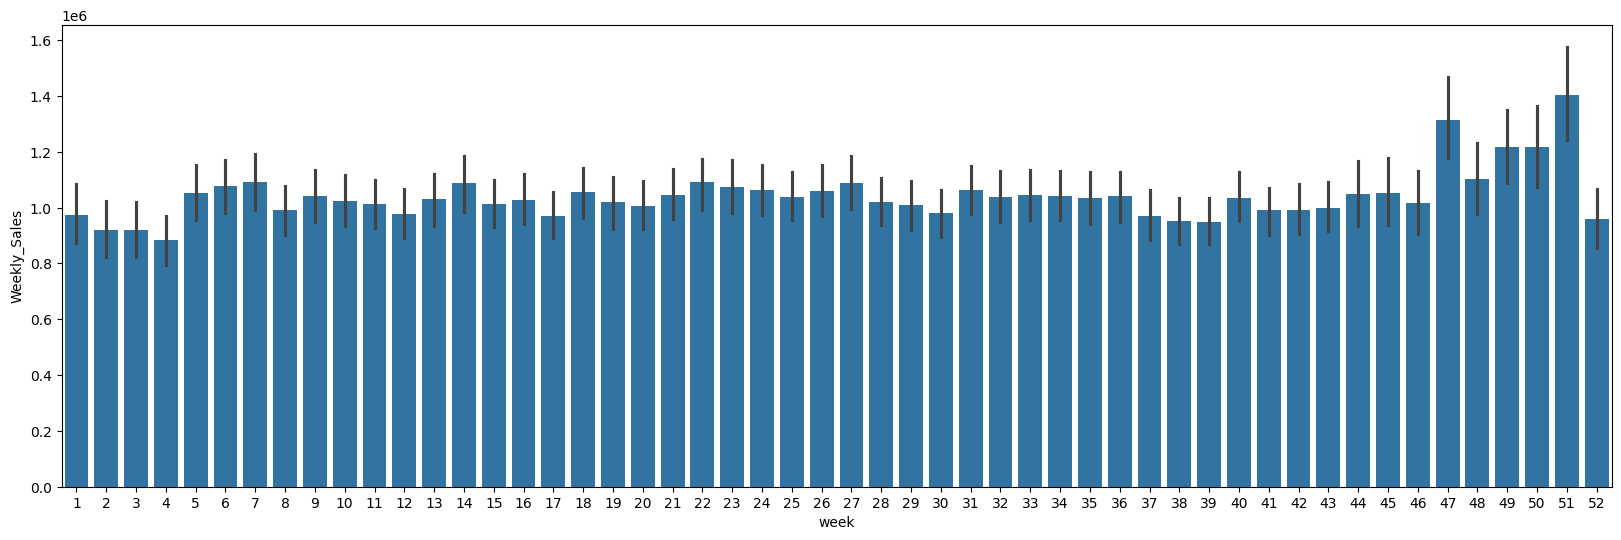

In [247]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=data1)

From graphs, it is seen that 51st week and 47th weeks have significantly higher averages.

## Fuel price Vs Weekly_Sales


<Axes: xlabel='Fuel_Price'>

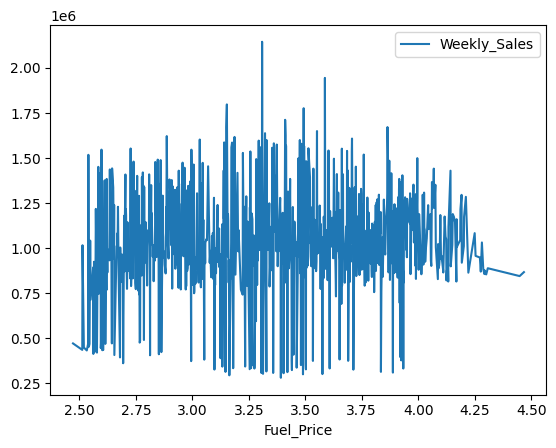

In [248]:
fuel_price = pd.pivot_table(data1, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

## **c. Does temperature affect the weekly sales in any manner?**

### Temperature Vs Weekly_Sales

<Axes: xlabel='Temperature'>

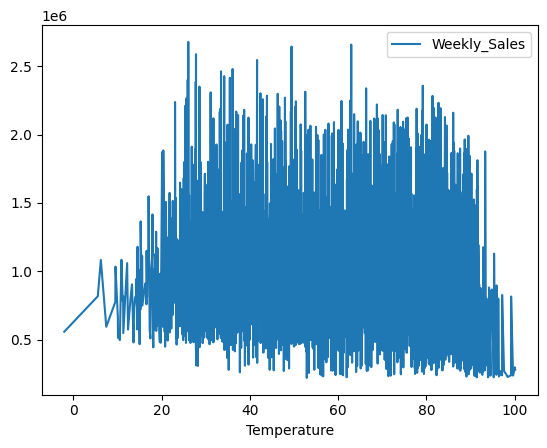

In [249]:
temp = pd.pivot_table(data1, values = "Weekly_Sales", index= "Temperature")
temp.plot()

In [250]:
correlation = data1['Weekly_Sales'].corr(data1['Temperature'])
correlation

-0.0443401833510951

A correlation coefficient of -0.06 indicates a very weak negative correlation between weekly sales and temperature. In other words, temperature does not have a meaningful impact on weekly sales in your dataset.

##**d. How is the Consumer Price index affecting the weekly sales of various stores?**

### CPI Vs Weekly_Sales

<Axes: xlabel='CPI'>

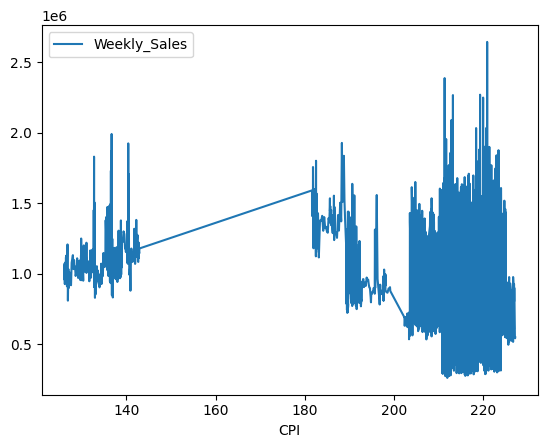

In [251]:
CPI = pd.pivot_table(data1, values = "Weekly_Sales", index= "CPI")
CPI.plot()

In [252]:
# Assuming 'Store' is the column indicating the store number
stores = data1['Store'].unique()

for store_num in stores:
    store_data = data1[data1['Store'] == store_num]
    correlation = store_data['Weekly_Sales'].corr(store_data['CPI'])
    print(f"Correlation between CPI and Weekly Sales for Store {store_num}: {correlation}")

Correlation between CPI and Weekly Sales for Store 1: 0.2254076594290444
Correlation between CPI and Weekly Sales for Store 2: -0.06378635682315911
Correlation between CPI and Weekly Sales for Store 3: 0.31724963399858214
Correlation between CPI and Weekly Sales for Store 4: 0.6752306670819369
Correlation between CPI and Weekly Sales for Store 5: 0.3082612991681616
Correlation between CPI and Weekly Sales for Store 6: 0.03352377390274735
Correlation between CPI and Weekly Sales for Store 7: 0.28904437749320994
Correlation between CPI and Weekly Sales for Store 8: 0.1202552303609908
Correlation between CPI and Weekly Sales for Store 9: 0.2948054830029043
Correlation between CPI and Weekly Sales for Store 10: -0.13020526054073955
Correlation between CPI and Weekly Sales for Store 11: 0.06978058146346157
Correlation between CPI and Weekly Sales for Store 12: 0.08408667242574058
Correlation between CPI and Weekly Sales for Store 13: 0.40144542608895767
Correlation between CPI and Weekly Sa

* CPI does not have a meaningful impact on weekly sales in our dataset.

However,

* For Store 38, a correlation coefficient of 0.81 indicates a very strong positive correlation between the Consumer Price Index (CPI) and weekly sales. This suggests that as the CPI increases, weekly sales for Store 38 also tend to increase significantly.

* For Store 44, a correlation coefficient of 0.74 indicates a strong positive correlation between the CPI and weekly sales. This means that as the CPI increases, weekly sales for Store 44 also tend to increase, although the correlation is slightly weaker compared to Store 38.

* Both stores show a positive correlation between CPI and weekly sales, indicating that CPI is an important factor influencing sales in these stores.

## Unemployment Vs Weekly_Sales

<Axes: xlabel='Unemployment'>

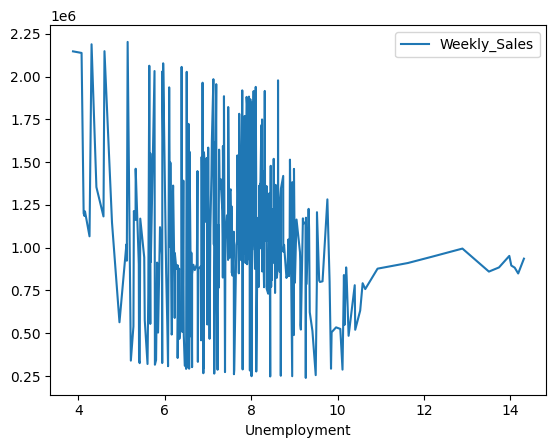

In [253]:
unemployment = pd.pivot_table(data1, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

* From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

### **Ploting Sales weekly, monthly, yearly:**

**ploting Sales:**

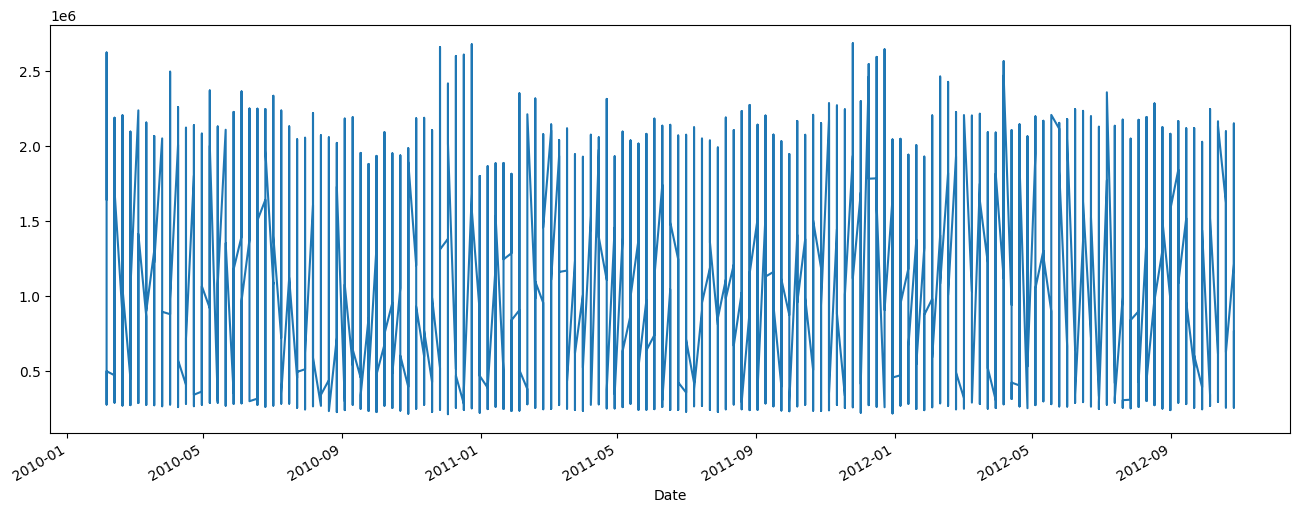

In [254]:
plt.figure(figsize=(16,6))
data1['Weekly_Sales'].plot()
plt.show()

In this data, there are lots of same data values. So, I will collect them together as weekly.

In [255]:
data1_week = data1.resample('W').mean() #resample data as weekly

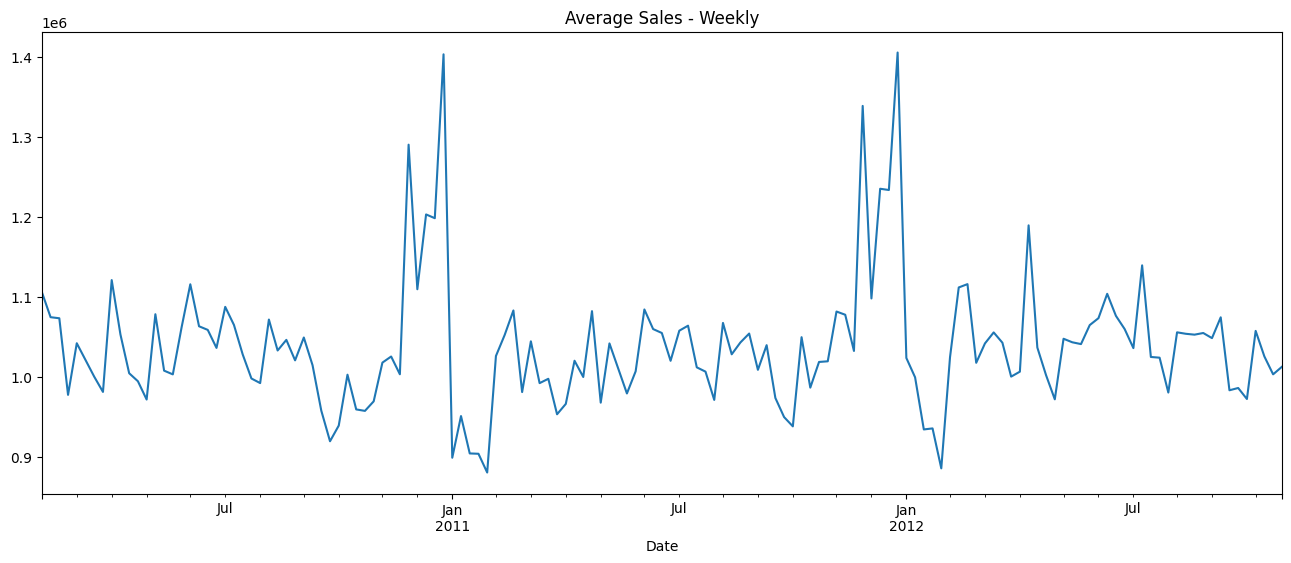

In [256]:
plt.figure(figsize=(16,6))
data1_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

With the collecting data as weekly, I can see average sales clearly. To see monthly pattern , I resampled my data to monthly also.

In [257]:
data1_month = data1.resample('MS').mean() # resampling as monthly

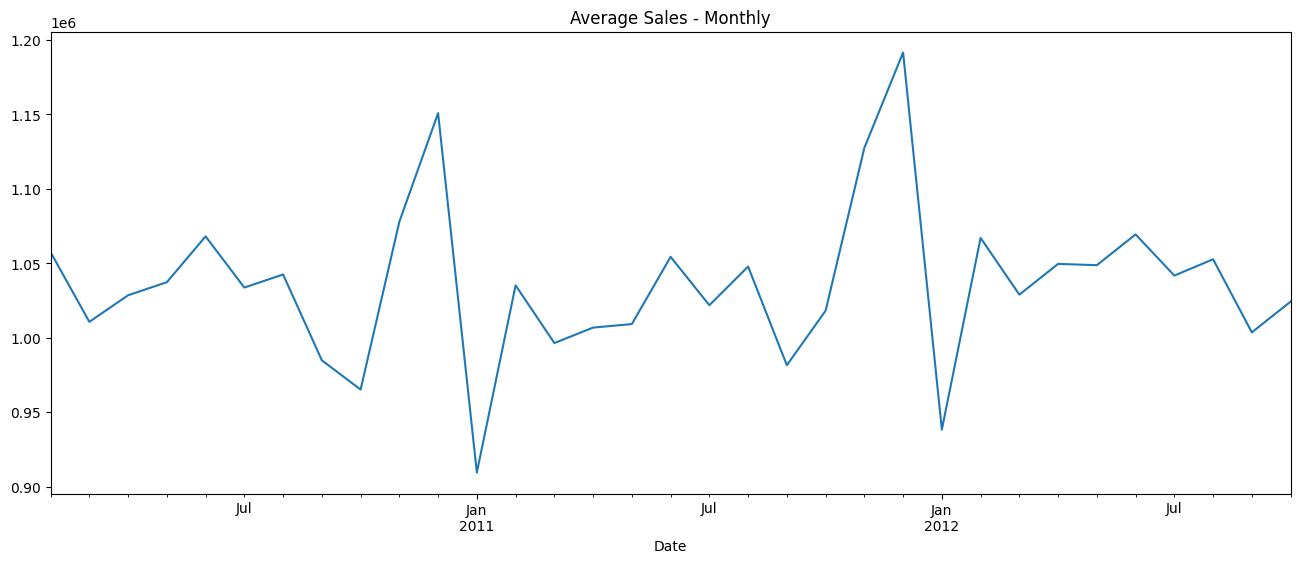

In [258]:
plt.figure(figsize=(16,6))
data1_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

When turned data to monthly, we I lost some patterns in weekly data. So, we will continue with weekly resampled data.

## Random Forest Regressor:

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [260]:
data1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
Date,,,,,,,,,,
2010-02-05,1,1643690.90000,0,42.31000,2.57200,211.09636,8.10600,5,2,2010
2010-02-12,1,1641957.44000,1,38.51000,2.54800,211.24217,8.10600,6,2,2010
2010-02-19,1,1611968.17000,0,39.93000,2.51400,211.28914,8.10600,7,2,2010
2010-02-26,1,1409727.59000,0,46.63000,2.56100,211.31964,8.10600,8,2,2010
2010-03-05,1,1554806.68000,0,46.50000,2.62500,211.35014,8.10600,9,3,2010
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95000,0,64.88000,3.99700,192.01356,8.68400,39,9,2012
2012-10-05,45,733455.07000,0,64.89000,3.98500,192.17041,8.66700,40,10,2012
2012-10-12,45,734464.36000,0,54.47000,4.00000,192.32727,8.66700,41,10,2012


In [261]:
X = data1.drop('Weekly_Sales', axis = 1)
y = data1['Weekly_Sales']

In [262]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
sc = StandardScaler()

In [265]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [266]:
y_train_arr = y_train.values
y_train = y_train_arr.reshape((-1,1))

In [267]:
y_train

array([[1518841.45],
       [1112034.72],
       [ 954396.85],
       ...,
       [ 533734.94],
       [ 397428.22],
       [ 404751.25]])

In [268]:
y_test_arr = y_test.values
y_test = y_test_arr.reshape((-1,1))

In [269]:
y_test

array([[1711562.73],
       [1006814.85],
       [ 432451.91],
       ...,
       [ 246277.18],
       [1537139.56],
       [1997397.63]])

In [270]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [271]:
y_pred = rf_regressor.predict(X_test)

In [272]:
from sklearn.metrics import r2_score

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9628032858247566


## Time Series Model:

In [273]:
data_week = pd.DataFrame(data1_week["Weekly_Sales"])
data_week

,Weekly_Sales
Date,
2010-02-07,1105572.01111
2010-02-14,1074148.39178
2010-02-21,1072822.08400
2010-02-28,977079.35844
2010-03-07,1041588.22889
...,...
2012-09-30,971886.65333
2012-10-07,1057036.42911
2012-10-14,1025078.09444


**To Observe 2-weeks Rolling Mean and Std:**

Data is non-stationary. So, will try to find more stationary version on it.

In [274]:
# finding 2-weeks rolling mean and std
roll_mean = data_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = data_week['Weekly_Sales'].rolling(window=2, center=False).std()

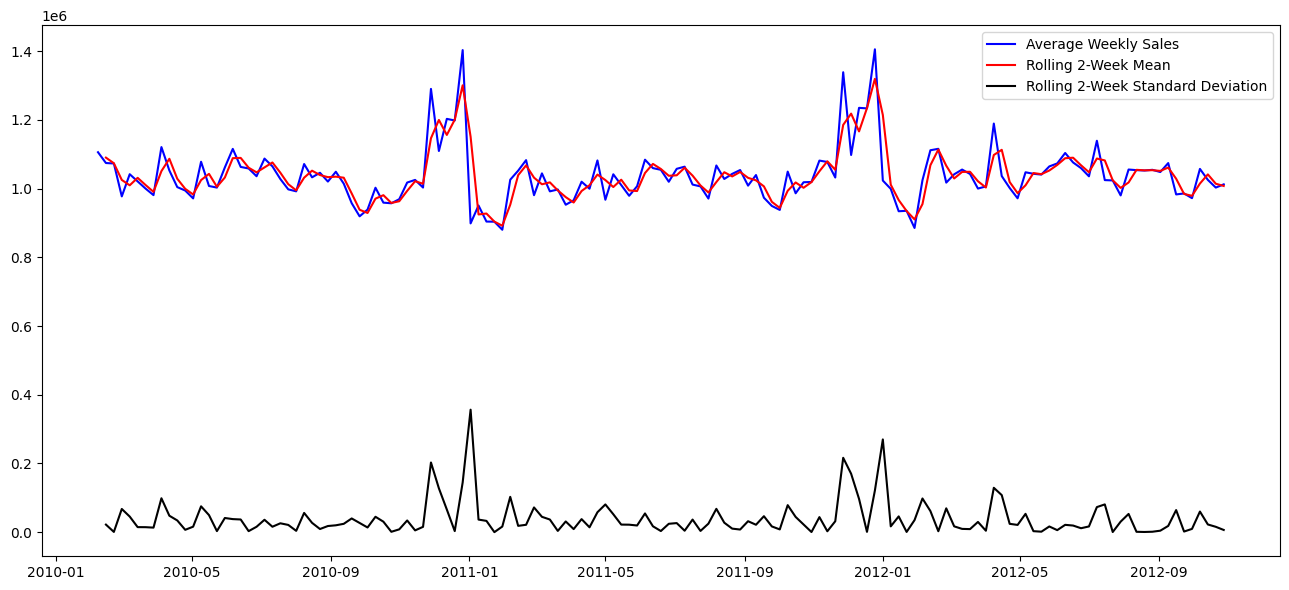

In [275]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(data_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

**We can indentify non-stationary time series data using the augmented Dicky-Fuller Test:**

In [276]:
result = adfuller(data_week['Weekly_Sales'])

In [277]:
result

(-4.249072629492298,
 0.0005436003209383602,
 6,
 136,
 {'1%': -3.4793722137854926,
  '5%': -2.8830370378332995,
  '10%': -2.578233635380623},
 3224.7567563250914)

It is a Stationary Data.

## **b. If the weekly sales show a seasonal trend, when and what could be the reason?**

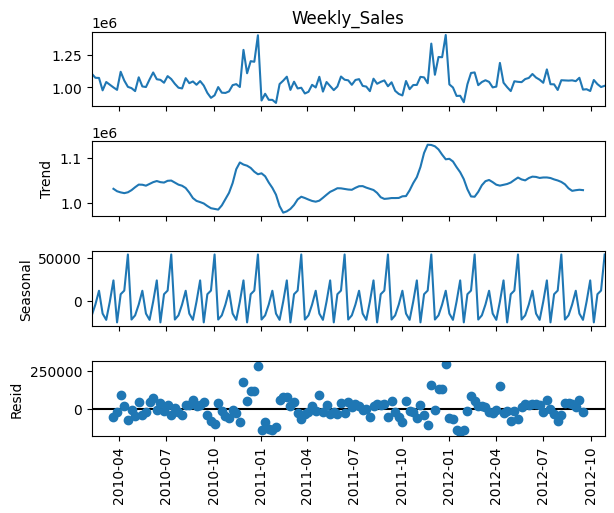

In [278]:
# Perform seasonal decomposition
decompose_result = seasonal_decompose(data_week['Weekly_Sales'], model='additive', period=12)

# Plot the decomposition
decompose_result.plot()

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [279]:
# Create a new column 'Holiday_Type' to classify weeks as holiday or non-holiday
data1['Holiday_Type'] = data1['Holiday_Flag'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Set the display option to show floats with 2 decimal places
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Calculate average sales for holiday and non-holiday weeks
average_sales = data1.groupby('Holiday_Type')['Weekly_Sales'].mean()

# Print the average sales for comparison
print(average_sales)

Holiday_Type
Holiday       1086950.31088
Non-Holiday   1032370.01777
Name: Weekly_Sales, dtype: float64


Average weekly sales for holidays are significantly higher than not-holiday days.    
By focusing on the holiday weeks and comparing them to non-holiday weeks, we can gain insights into the seasonal trend in our weekly sales data and understand the impact of holidays on consumer behavior and purchasing patterns.  



### **ACF(Auto correlation Function) and PACF(Partial Autocorrelation Function) are used to identify the order of the model in ARIMA models.**

In [280]:
import warnings
warnings.filterwarnings('ignore')

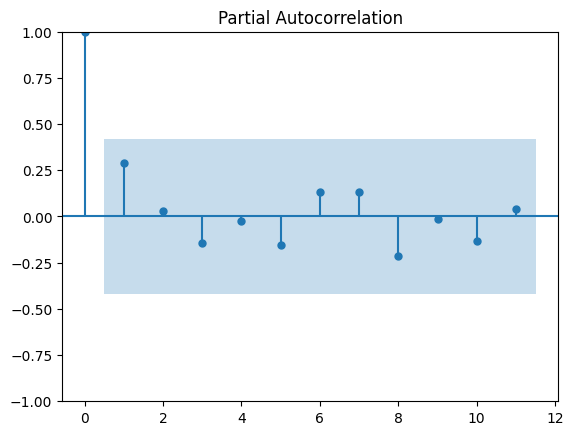

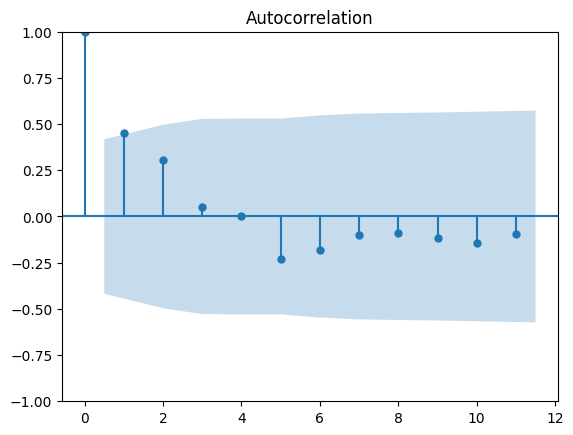

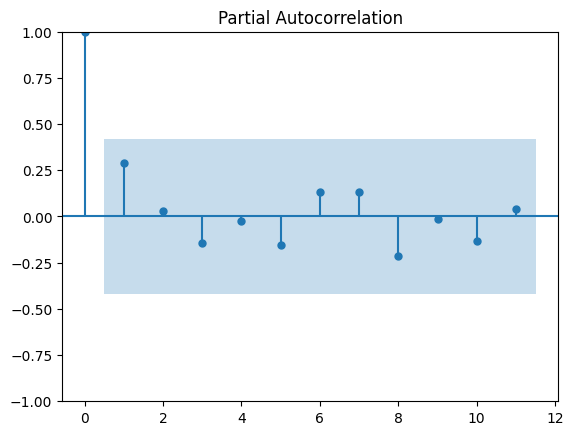

In [281]:
acf_plot=acf(data_week["Weekly_Sales"])
pacf_plot=pacf(data_week["Weekly_Sales"])
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [282]:
data_week.shape

(143, 1)

In [283]:
from statsmodels.tsa.arima.model import ARIMA
## !pip install pmdarima
## from pmdarima import auto_arima

train = data_week.iloc[0:126]['Weekly_Sales']
test = data_week.iloc[126:]['Weekly_Sales']

In [284]:
len(data_week)-1

142

In [285]:
len(train)

126

In [286]:
test.shape

(17,)

In [287]:
train.shape

(126,)

In [288]:
model = ARIMA(train, order = (1,0,2))
model_trained = model.fit()

In [289]:
# Predict for the next 12 weeks (12 periods into the future)
end_prediction = len(data_week) + 11  # Predict for 12 weeks
data_week['predicted'] = model_trained.predict(start=len(train), end=end_prediction, dynamic=True)
# data_week['predicted'] = model_trained.predict(start = len(train), end = len(data_week)-1, dynamic = True)

<Axes: xlabel='Date'>

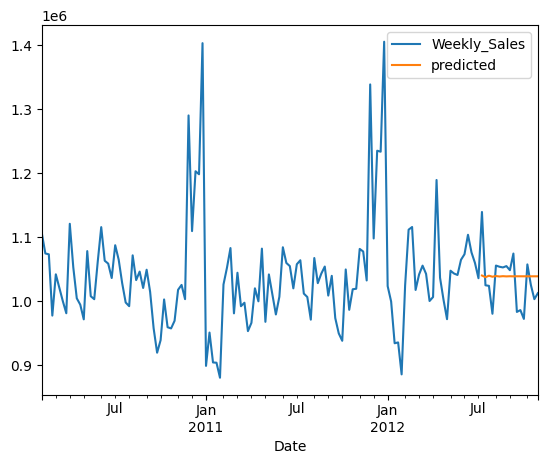

In [290]:
data_week[['Weekly_Sales', 'predicted']].plot()

In [291]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order = (1,0,2), seasonal_order = (1,0,2,12))

model = model.fit()

In [292]:
data_week['predicted'] = model.predict(start = len(train), end = len(data_week)-1, dynamic = True)

<Axes: xlabel='Date'>

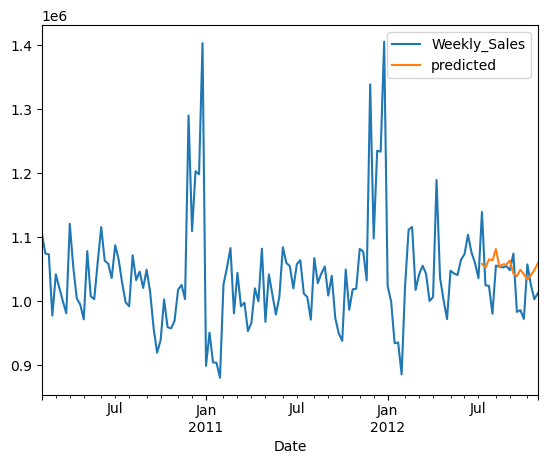

In [293]:
data_week[['Weekly_Sales', 'predicted']].plot()

## **a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

In [294]:
correlation_per_store = data1.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))

# Find the store with the most negative correlation (i.e., suffering the most)
most_affected_store = correlation_per_store.idxmin()
most_affected_store_correlation = correlation_per_store.min()

print(f"The store suffering the most is {most_affected_store} with a correlation coefficient of {most_affected_store_correlation}")

The store suffering the most is 38 with a correlation coefficient of -0.7852902748572028


In [295]:
correlation_per_store.sort_values().head()

Store
38   -0.78529
44   -0.78008
4    -0.63956
13   -0.40025
39   -0.38468
dtype: float64